In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

### 1. Formulate the statement of the interpolation problem with Cubic Spline [mathematical formula]

$$y_i = f(x_i), x_i \in \Omega_n, \Omega_n: \{[a, b] \subset R^n, h_{i+1} = x_{i+1} - x_i\}$$ 

$$S_3(x) - ?$$

$$S_3(x) = \bigcup_{ i = 0}^{n - 1} S_{3,i}(x)$$

$$S_3(x) \in C_2[a,b], q = 1$$

$$S_{3,i}(x) = a_{0,i} + a_{1, i}(x - x_i) + a_{2, i}(x - x_i)^2 + a_{3,i}(x - x_i)^3$$


### 2. Formulate the functional and differential compatibility conditions [mathematical formula]

Differential compatibility condidtions for each element of $S_{m}$:

$$\delta S_{3,i}^{(p2)}(x_j) = S_{3,i}^{(p2)}(x_j) - f^{(p2)}(x_j) = 0, j = i,i+1$$

Functional compatibility condidtion for each element of $S_{m}$:

$$\delta S_{3,i}(x_j) = S_{3,i}(x_j) - f(x_j) = 0, j = i, i + 1$$

$$ p1 \cap p2 = \emptyset$$

$$ 0 \le p1 \le r, 0 \le p2 \le r$$

$$ p1 \cup p2  = p, p: S_3(x) \in C_2[a, b]$$

$$ p1 = \{1\}, p2 = \{0, 2\} $$


### 3. Formulate stitching conditions [mathematical formula]

$$S_{m,i-1}^{(p1)}(x)|_{x = x_i} = S_{m,i}^{(p1)}(x)|_{x = x_i}, i = \overline{1,n-1}$$






### 4. Justify why these conditions provide you with the required smoothness [thesis text, no more than 500 characters]

Functional condition provides soundness for interpolation task. So the resulting $S_3(x)$ will go through given points $(x_i, y_i), i \in \Omega_n$

Differential condition together with stiching conditions makes resulting $S_3(x)$ smooth, i.e. in every point $x \in [a, b]$ there exist $r$ derivatives. Stiching conditions make sure that resulting $S_3(x)$ doesn't have breaking points, i.e. points where first derivative is not equal.

This is needed because on practice we don't know anything about real function $f$. By applying this conditions, our approximated function $\hat{f}(x, a)$ is more convinient to work with.




### 5. Derive dependency formula: the dependence of the second derivatives at the grid nodes on the increment of the function (the function values difference on the grid nodes). [Mathematical formulas derivation. Detailed, with clear transitions]

Function of $S_{3,i}$ and its first and second derivatives:
$$S_{3,i}(x) = a_{0,i} + a_{1, i}(x - x_i) + a_{2, i}(x - x_i)^2 + a_{3,i}(x - x_i)^3$$

$$S_{3,i}'(x) = a_{1, i} + 2a_{2, i}(x - x_i) + 3a_{3,i}(x - x_i)^2$$

$$S_{3,i}''(x) = 2a_{2, i} + 6a_{3,i}(x - x_i)$$

Let's start from functional condition. 

Substitute with $j=i$:
$$\delta S_{3,i}(x_i), a_{0,i} = f(x_i)$$

Substitute with $j=i+1$:
$$\delta S_{3,i}(x_{i+1}), a_{0, i} + a_{1, i}(x_{i+1} - x_i) + a_{2, i}(x_{i+1} - x_i)^2 + a_{3,i}(x_{i+1} - x_i)^3 - f(x_{i+1}) = 0$$


Using substitution of $j=i$ and more short definitions:
$$h_{i+1} = x_{i+1} - x_i, \Delta f_i = f(x_{i+1}) - f(x_i) $$
$$\delta S_{3,i}(x_{i+1}), a_{1, i}h_{i+1} + a_{2, i}h_{i+1}^2 + a_{3,i}h_{i+1}^3 - \Delta f_i = 0$$

Our unknown variables are second derivatives:
$$m_i = f''(x_i)$$

Applying substition of $j=i$ for differential condition:
$$\delta S_{3,i}''(x_i), 2a_{2,i} = m_i$$

Substitution of $j=i+1$
$$\delta S_{3,i}''(x_{i+1}), 2a_{2,i} + 6a_{3,i}h_{i+1} - m_{i+1} = 0$$
$$\Delta m_i = m_{i+1} - m_i$$

Combining susbtitutions:
$$\delta S_{3,i}''(x_{i+1}), 6a_{3,i}h_{i+1} - \Delta m_i = 0$$

Deriving parameters for polynomial function $S_{3,i}$
$$a_{0,i} = f(x_i)$$
$$a_{1,i} = \frac{\Delta f_i}{h_{i+1}} - \frac{m_i h_{i+1}}{2} - \frac{\Delta m_i h_{i+1}}{6}$$
$$a_{2,i} = \frac{m_i}{2} $$
$$a_{3,i} = \frac{\Delta m_i}{6 h_{i+1}}$$ 

$$S_{3,i}(x) = f({x_i}) + (\frac{\Delta f_i}{h_{i+1}} - \frac{\Delta m_i h_{i+1}}{2} - \frac{\Delta m_i h_{i+1}}{6})(x - x_i) + \frac{m_i}{2}(x - x_i)^2 + \frac{\Delta m_i}{6 h_{i+1}}(x - x_i)^3$$

Now let's close our system using stiching conditions:

$$S_{3,i}'(x_i) = a_{1,i} = \frac{\Delta f_i}{h_{i+1}} - \frac{m_i h_{i+1}}{2} - \frac{\Delta m_i h_{i+1}}{6}$$

$$S_{3,i-1}'(x_i) = a_{1, i-1} + 2a_{2,i-1}({x_i - x_{i-1}}) + 3a_{3,i-1}(x_i - x_{i-1})^2 = a_{1,i-1} + 2a_{2,i-1}h_i + 3a_{3,i-1}h_i^2 = \frac{\Delta f_{i-1}}{h_i} - \frac{m_{i-1}}{2}h_i - \frac{\Delta m_{i-1}}{6}h_i + m_{i-1}h_i + \frac{\Delta m_{i-1}}{2}{h_i} = \frac{\Delta f_{i-1}}{h_i} + \frac{m_{i-1}}{2}h_i + \frac{\Delta m_{i-1}}{3}{h_i}$$

Equation of stiching condition:
$$\frac{\Delta f_{i-1}}{h_i} + \frac{m_{i-1}}{2}h_i + \frac{\Delta m_{i-1}}{3}{h_i} = \frac{\Delta f_i}{h_{i+1}} - \frac{m_i h_{i+1}}{2} - \frac{\Delta m_i h_{i+1}}{6}$$

$$\frac{\Delta f_{i-1}}{h_i} + \frac{h_i}{2}m_{i-1} + \frac{h_i}{3}{m_i} - \frac{h_i}{3}m_{i-1} = \frac{\Delta f_i}{h_{i+1}} - \frac{h_{i+1}}{2}m_i - \frac{h_{i+1}}{6}m_{i+1} + \frac{h_{i+1}}{6}m_i$$

$$\frac{\Delta f_{i-1}}{h_i} + \frac{h_i}{6}m_{i-1} + \frac{h_i}{3}{m_i} = \frac{\Delta f_i}{h_{i+1}} - \frac{h_{i+1}}{3}m_i - \frac{h_{i+1}}{6}m_{i+1}$$

Finally, obtaining formula for vector $m_i$
$$\frac{h_i}{6}m_{i-1} + \frac{h_i + h_{i+1}}{3}{m_i} + \frac{h_{i+1}}{6}m_{i+1}= \frac{\Delta f_i}{h_{i+1}} - \frac{\Delta f_{i-1}}{h_i}, i = \overline{1,n-1}$$

### 6. Create a system of equations using this formula [Matrix representation. Mathematical formulas]

$$
\begin{bmatrix}
 &h_1  &2(h_1+h_2)  &h_2  &0  &0  &0   &\cdots  &0  &0 &0 \\ 
 &0  &h_2  &2(h_2 + h_3)  &h_3  &0  &0  &\cdots  &0  &0 &0\\ 
 &0  &0  &h_3  &2(h_3 + h_4)  &h_4  &0  &\cdots  &0  &0 &0\\ 
 &0  &0  &0  &h_4  &2(h_4 + h_5))  &h_5  &\cdots  &0  &0 &0\\ 
 &\vdots  &\vdots  &\vdots  &\vdots  &\ddots  &\ddots  &\ddots  &\vdots  &\vdots &\vdots\\ 
 &0  &0  &0  &0  &0  &0  &0 &h_{n-1}  &2(h_{n-1} - h_n)  &h_n \\ 
\end{bmatrix}
\begin{bmatrix}
m_0\\ 
m_1\\ 
m_2\\ 
m_3\\ 
m_4\\ 
m_5\\ 
\vdots\\ 
m_n\\  
\end{bmatrix}
=
\begin{bmatrix}
6(\frac{\Delta f_1}{h_{2}} - \frac{\Delta f_{0}}{h_1})\\ 
6(\frac{\Delta f_2}{h_{3}} - \frac{\Delta f_{1}}{h_2})\\ 
6(\frac{\Delta f_3}{h_{4}} - \frac{\Delta f_{2}}{h_3})\\ 
6(\frac{\Delta f_4}{h_{5}} - \frac{\Delta f_{3}}{h_4})\\ 
6(\frac{\Delta f_5}{h_{6}} - \frac{\Delta f_{4}}{h_5})\\ 
\vdots\\ 
6(\frac{\Delta f_{n-1}}{h_{n}} - \frac{\Delta f_{n-2}}{h_{n-1}})\\ 
\end{bmatrix}
$$








### 7. Explain what is an unknown variable in this system. whether the system is closed with respect to an unknown variable. What is missing for closure. [Text, no more than 200 characters]

$m$ is a vector of unknown variables. By definition, it is second derivative of original function in points $x_i,i= \overline{0,n}$ 

Final matrix is in the form of $n \times (n-2)$, so we need two conditions for $m_0$ and $m_n$

There are various methods to approximate them. The most simple is to assume there are 0, $m_0=m_n=0$. Others include assumptions on equality for first and last two segments.

In the end we will have matrix in the form of $(n-2) \times (n-2)$ with $n-2$ unknown variables




### 8. Bring this matrix to the appropriate form to use the Tridiagonal matrix algorithm [Mathematical derivation. Use Gauss Elimination]

$$
\begin{bmatrix}
 &2(h_1+h_2)  &h_2  &0  &0  &0   &\cdots  &0  &0 \\ 
 &h_2  &2(h_2 + h_3)  &h_3  &0  &0  &\cdots  &0  &0\\ 
 &0  &h_3  &2(h_3 + h_4)  &h_4  &0  &\cdots  &0  &0\\ 
 &0  &0  &h_4  &2(h_4 + h_5))  &h_5  &\cdots  &0  &0\\ 
 &\vdots  &\vdots  &\vdots  &\ddots  &\ddots  &\ddots  &\vdots  &\vdots\\ 
 &0  &0  &0  &0  &0  &0 &h_{n-1}  &2(h_{n-1} - h_n) \\ 
\end{bmatrix}
\begin{bmatrix} 
m_1\\ 
m_2\\ 
m_3\\ 
m_4\\ 
m_5\\ 
\vdots\\ 
m_{n-1}\\  
\end{bmatrix}
=
\begin{bmatrix}
6(\frac{\Delta f_1}{h_{2}} - \frac{\Delta f_{0}}{h_1})\\ 
6(\frac{\Delta f_2}{h_{3}} - \frac{\Delta f_{1}}{h_2})\\ 
6(\frac{\Delta f_3}{h_{4}} - \frac{\Delta f_{2}}{h_3})\\ 
6(\frac{\Delta f_4}{h_{5}} - \frac{\Delta f_{3}}{h_4})\\ 
6(\frac{\Delta f_5}{h_{6}} - \frac{\Delta f_{4}}{h_5})\\ 
\vdots\\ 
6(\frac{\Delta f_{n-1}}{h_{n}} - \frac{\Delta f_{n-2}}{h_{n-1}})\\ 
\end{bmatrix}
$$











### 9. Derive formulas of direct pass and reverse pass of Tridiagonal matrix algorithm [Mathematical formals]

$$c_i = h_{i+1}$$
$$b_i = 2(h_i+ h_{i+1})$$
$$a_i = h_i$$
$$d_i = 6(\frac{\Delta f_i}{h_{i+1}} - \frac{\Delta f_{i-1}}{h_i})$$

Forward pass:
$$w_i = \frac{a_i}{b_{i-1}}= \frac{h_i}{2(h_{i-1} + h_{i})} $$  
$$b_i = b_i - w_i c_{i-1} = 2(h_i+ h_{i+1}) - \frac{h_i^2}{2(h_{i-1} + h_{i})} $$
$$d_i = d_i - w_i d_{i-1} = 6(\frac{\Delta f_i}{h_{i+1}} - \frac{\Delta f_{i-1}}{h_i}) - \frac{3h_i}{(h_{i-1} + h_{i})}(\frac{\Delta f_{i-1}}{h_i} - \frac{\Delta f_{i-2}}{h_{i-1}}) $$

Backward pass:

$$x_n = \frac{d_n}{b_n}$$
$$x_i = \frac{d_n - c_i x_{i+1}}{b_n}$$


### 10. Implement code prototype of the future algorithm implementation. Classes/methods (if you use OOP), functions. The final implementation (on language chosen by you) should not differ from the functions declared in the prototype. [Python code]

In [6]:
import matplotlib.pyplot as plt 
import numpy as np

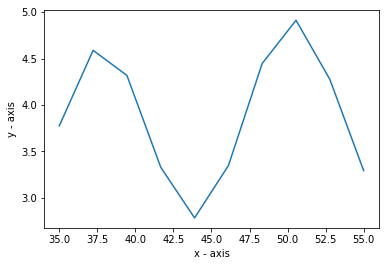

In [18]:
def grid_function():
    x = np.linspace(35, 55, 10)
    y = np.log(x) + np.cos(x/2)
    return np.array((x,y))

points = grid_function()

plt.plot(points[0], points[1])
plt.xlabel('x - axis') 
plt.ylabel('y - axis') 
plt.show()

In [100]:
def solve_triangle(m):
    a = 0
    b = 1
    c = 2
    d = 3
    for i in range(1, m.shape[1]):
        previous_step = m[:, i - 1]
        current_step = m[:, i]
        
        w = current_step[a] / previous_step[b]
        
        new_b = current_step[b] - w * previous_step[c]
        new_d = current_step[d] - w * previous_step[d]
        
        m[:,i] = np.array([0, new_b, current_step[c], new_d])
    
    last_row = m[:,-1]
    solution = [last_row[d]/ last_row[b]]
    
    for i in range(m.shape[1] - 2, -1, -1):
        current_step = m[:, i]        
        solution.append((current_step[d] - current_step[c] * solution[-1])/current_step[b])
        
    solution = np.array(solution)
    solution = np.flip(solution)
    return solution

In [101]:
def solve(x,y):
    a = x[1:-1] - x[:-2] 
    c = x[2:] - x[:-2]
    b = 2 * (a + c)
    d = 6 * ((y[2:] - y[1:-1]) / c - (y[1:-1] - y[:-2]) / a)
    
    matrix = np.stack([a,b,c,d])
    m = solve_triangle(matrix)

    m = np.concatenate([[0], m, [0]])
    
    a_0 = y[:-1]
    a_1 = (y[1:] - y[:-1]) / (x[1:] - x[:-1]) \
    - (x[1:] - x[:-1]) * m[:-1] / 2 - (x[1:] - x[:-1]) * (m[1:] - m[:-1]) / 6
    a_2 = m[:-1] / 2
    a_3 = (m[1:] - m[:-1]) / (x[1:] - x[:-1]) / 6
    
    return np.stack([a_0,a_1,a_2,a_3]).T

In [106]:
def plot_solution(x, solution):
    x_new = np.linspace(35, 55, 100)
    y_org = np.log(x_new) + np.cos(x_new/2)
    plt.plot(x_new, y_org)
    for i in range(1, len(x)):
        selected_x = x_new[x_new <= x[i]]
        selected_x = selected_x[selected_x >= x[i-1]]
        h = selected_x - x[i - 1]
        y_approx = np.polynomial.polynomial.polyval(h, solution[i-1])
        plt.plot(selected_x, y_approx)

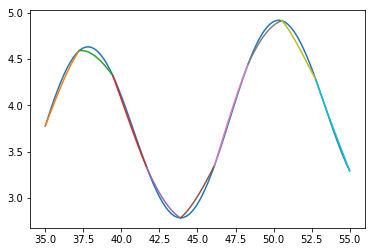

In [107]:
solution = solve(points[0], points[1])
plot_solution(points[0], solution)

### 11. Derive formula of Cubic Spline method error [Mathematical formulas]

Interpolation error for polynomial function
$$R_n(x) = f(x) - P_n(x)$$
$$R_n(x) = \frac{f^{n+1}(\xi)}{(n+1)!}\prod_{j=0}^{n}(x-x_j), \xi \in [a,b]$$

This formula is approximated (for $h - const$):
$$|R_n(x)| \le \frac{h^{n+1}}{n+1}max_{\xi \in [a,b]}|f^{n+1}(\xi)|$$

Because on each spline is cubic polynomial, whole function $S_3(x)$ is a polynomial with $n=3$. Thus formula becomes:
$$|R_n(x)| \le \frac{h^4}{4}max_{\xi \in [a,b]}|f^{4}(\xi)| $$


### 12. Rate the complexity of the algorithm [Text, and rate in terms of big O, no more than 100 characters]

Forward pass takes $n - 1$ steps: complexity - $O(n)$

Backward pass takes $n - 1$ steps: complexity - $O(n)$

Sum: $2n - 2$: complexity - $O(n)$







### Congrats!